<a href="https://colab.research.google.com/github/salwaadalla/inn-hotels-cancellation-prediction/blob/main/INNHotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from statsmodels.tools.sm_exceptions import PerfectSeparationWarning

warnings.filterwarnings("ignore", category=PerfectSeparationWarning)


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/python course/INNHotelsGroup.csv')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [ ]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [ ]:
df.shape

(36275, 19)

- The datast has 36275 rows and 19 columns of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Booking status is the dependent variable - object type.
* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

In [ ]:
df.duplicated().sum()

0

- No duplicated in data set.
  
Since values of Booking ID column are unique and insignificant to the analysis the columnn will be troped.

In [ ]:
df = df.drop('Booking_ID', axis=1)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values in the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is unusual and need to be checked.
* There is two years of data 2017 and 2018.
* At least 75% of the customers do not require car parking space.
* At least 75% of the customers are not repeating customers.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* The average price of the room is around 130 Euro.
* There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.


In [ ]:
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )

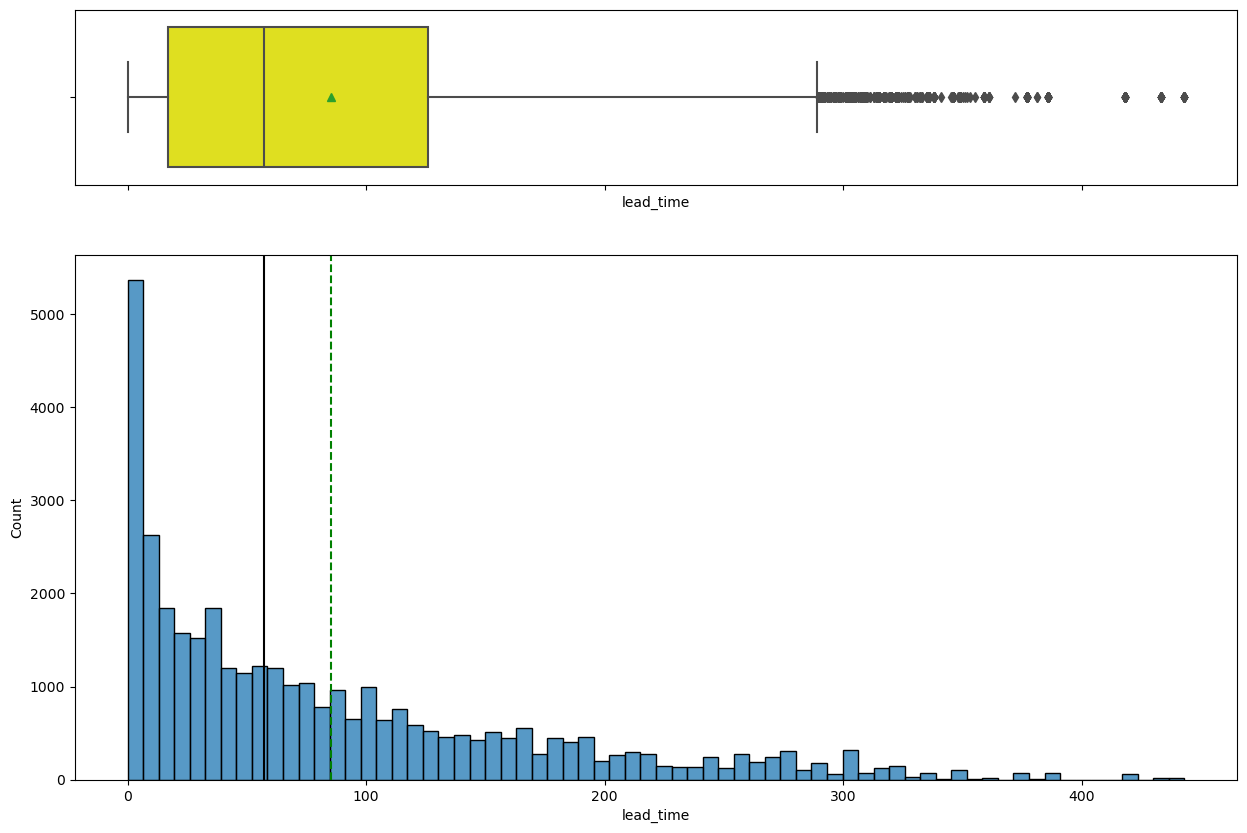

In [ ]:
histogram_boxplot(df, "lead_time")

* The distribution is right-skewed, with many visitors making their reservations almost one year in advance.
* The average reservation is made three months in advance.
* Many customers have made the booking on the same day of arrival as well.

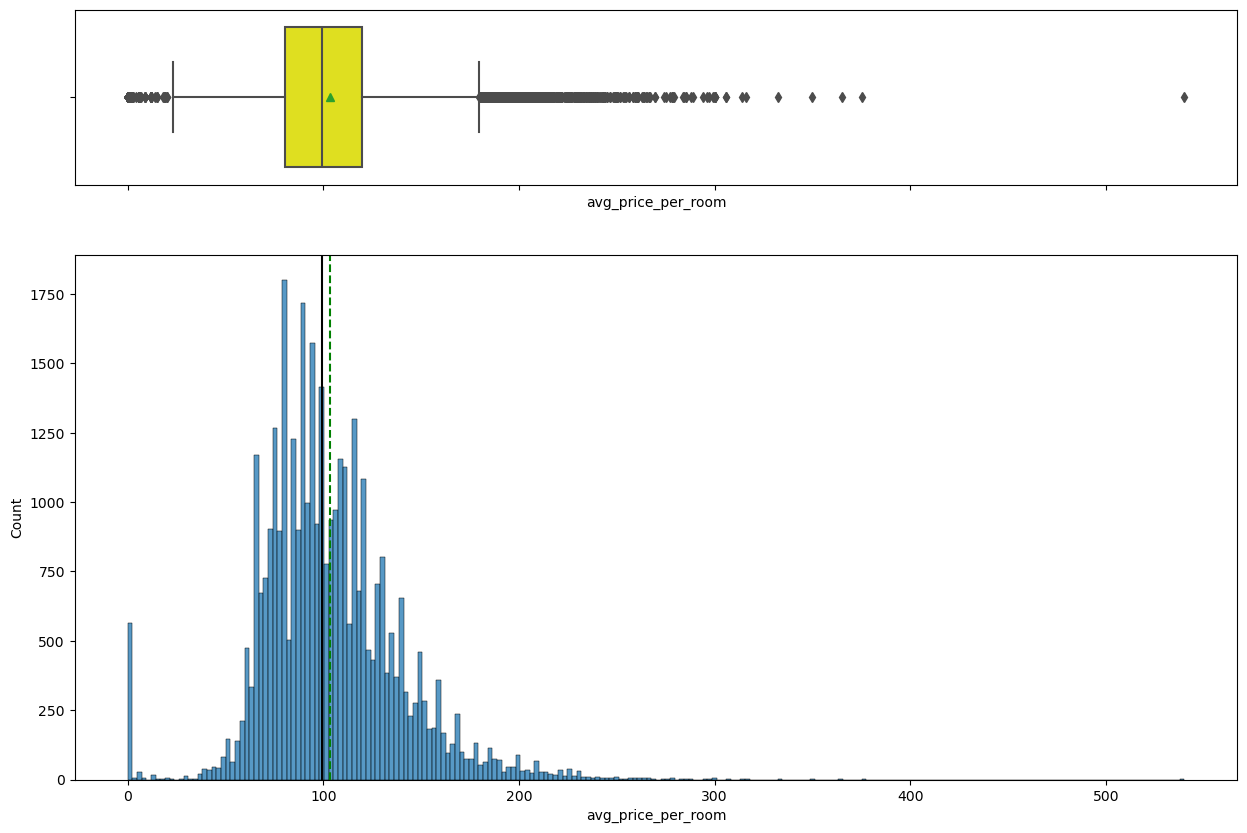

In [ ]:
histogram_boxplot(df,'avg_price_per_room')

* The data is uniformly distributed and highly right-skewed. There are outliers on both sides.
* 50% of the room prices range from 80 Euro to 120 Euro, with an average price around ~100 euros.
* There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values, it will be cliped to the upper whisker (Q3 + 1.5 * IQR).
* The graph shows that there are a number of rooms priced at 0 Euro that need to be checked.

In [ ]:
df[df["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [ ]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

* All rooms priced at zero were either complementary or reserved through an online offer.

In [ ]:
Q1 = data["avg_price_per_room"].quantile(0.25)
Q3 = data["avg_price_per_room"].quantile(0.75)

IQR = Q3 - Q1

Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

* Values that fall above the upper whisker values are considered outliers and will be replaced with the upper whisker value.

In [ ]:
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"]= Upper_Whisker

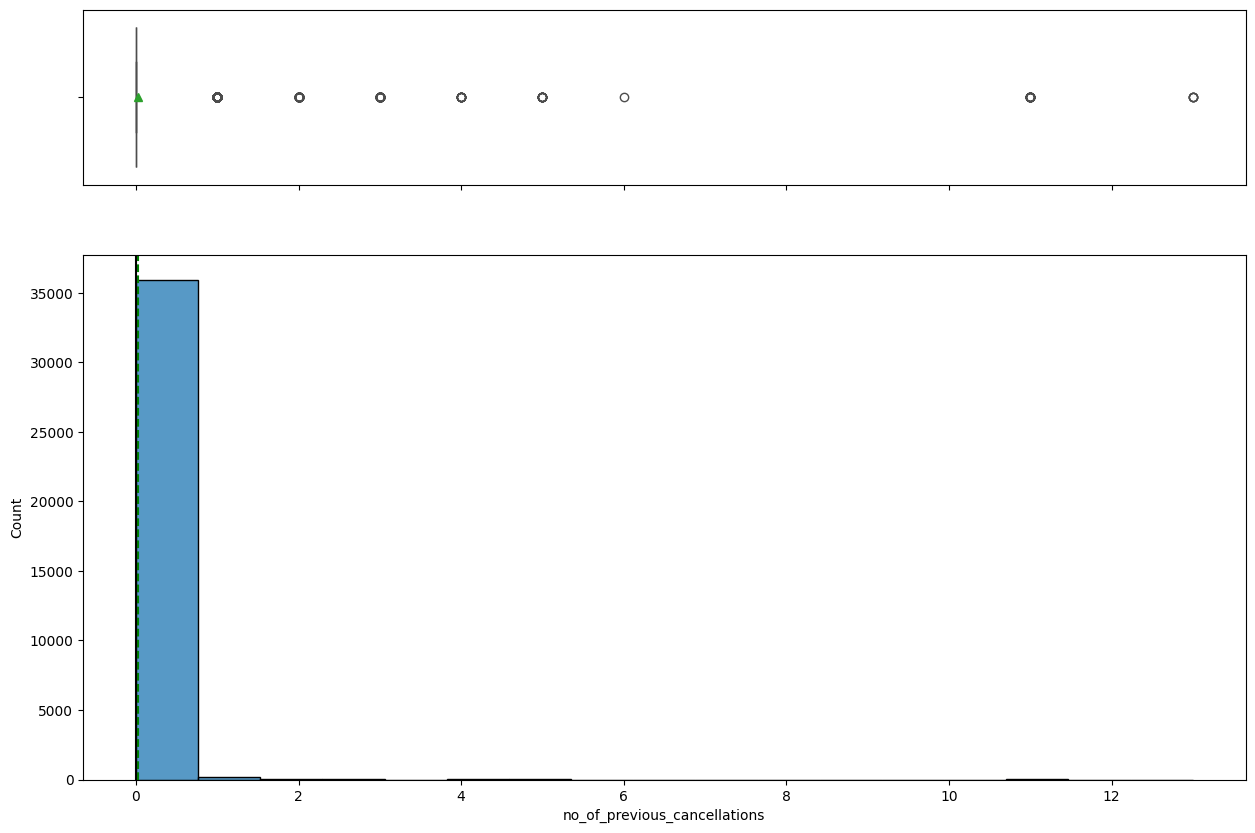

In [ ]:
histogram_boxplot(df,'no_of_previous_cancellations')

* Most customers do not have previous canceled reservations.
* Some customers canceled more than 12 times.

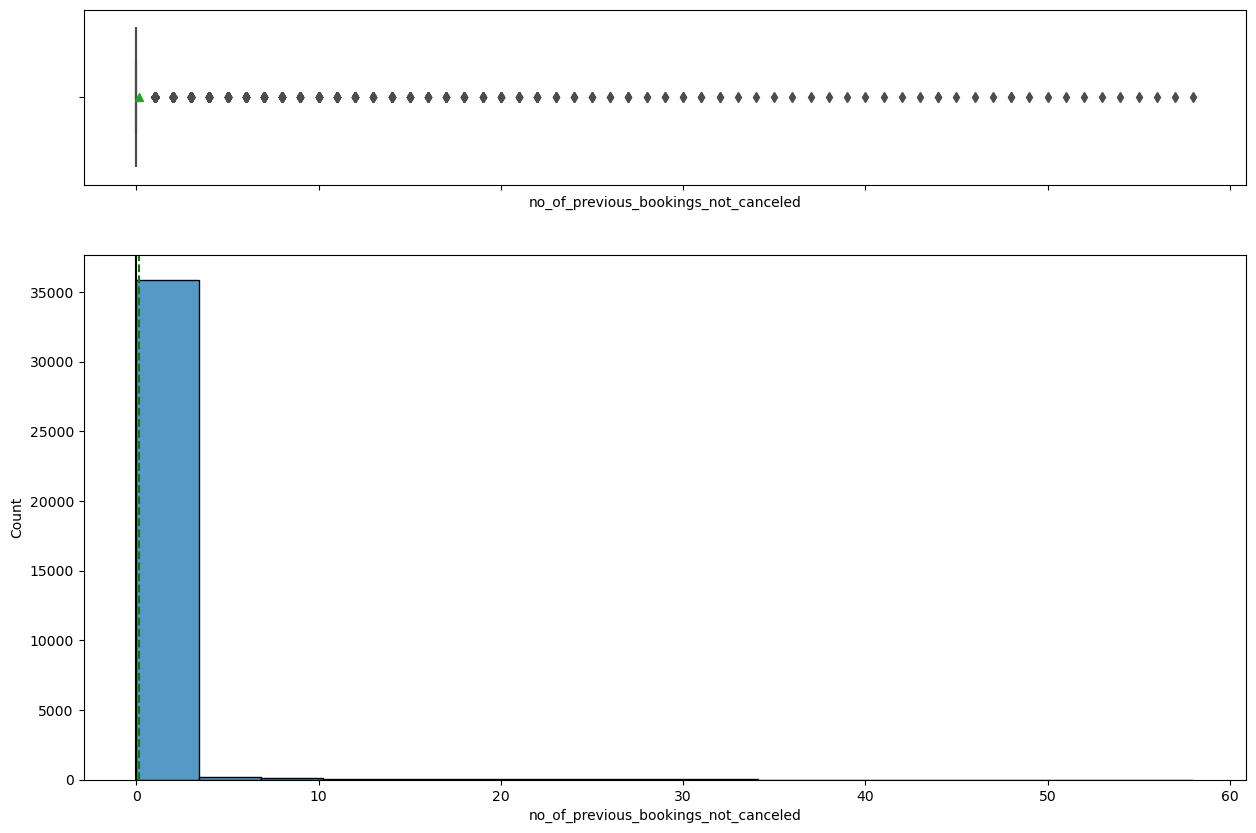

In [ ]:
histogram_boxplot(df,'no_of_previous_bookings_not_canceled')

* Very few customers have more than 1 booking not canceled previously.
* Some customers have not canceled their bookings around 60 times.

In [ ]:
def labeled_barplot(df, feature, perc=False, n=None):

    total = len(df[feature])
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

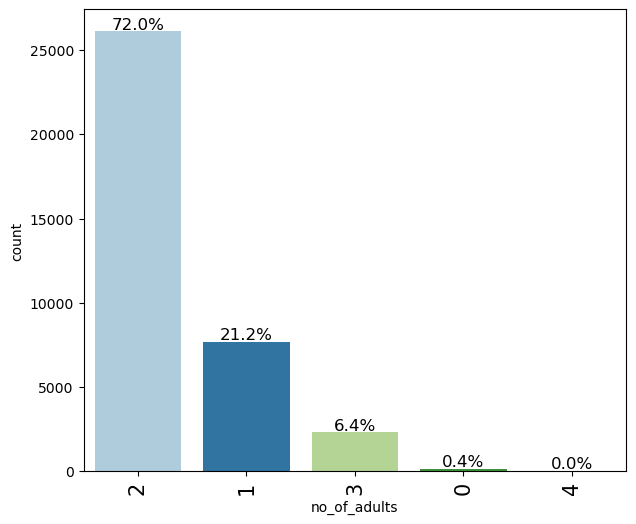

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

* Couples, comprising two adults, make up 72% of the hotel's visitors.

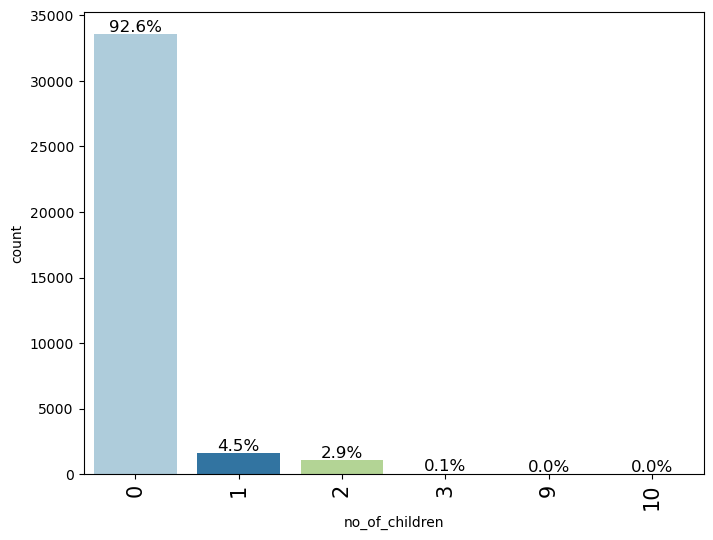

In [ ]:
labeled_barplot(df, 'no_of_children', perc=True)

*  92.6%, of the hotel visitors are without children.
*  The graph highlights reservations with 10 or 9 children, suggesting the need for correction.
* The reservations with 10 and 9 children will be replaced whith 3 children.

In [ ]:
 df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

In [ ]:
df['no_of_children'].value_counts()

no_of_children
0    33577
1     1618
2     1058
3       22
Name: count, dtype: int64

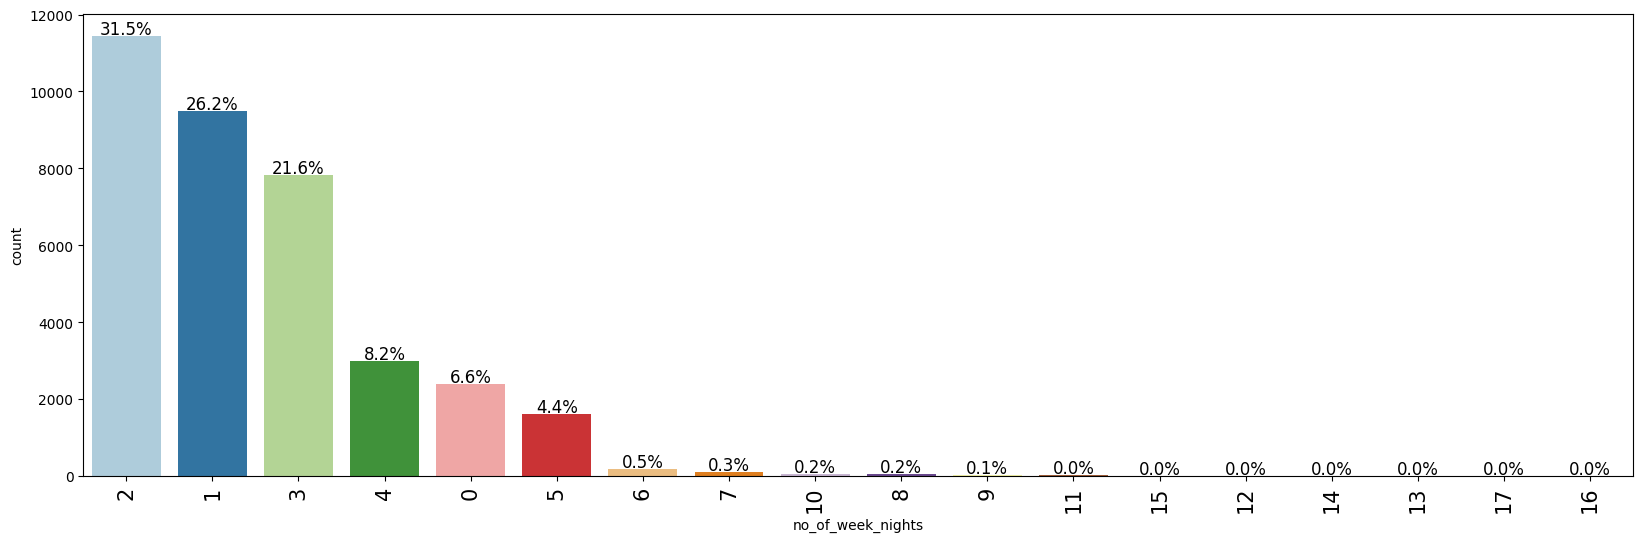

In [ ]:
labeled_barplot(df,'no_of_week_nights', perc = True)

* Around 50% of the hotel vistors spend 1 to 2 days during the week.
* 21.6% of the vistors spend 3 days at the hotel during the weekdays.
* A very less proportion of customers made the booking for more than 10 days.

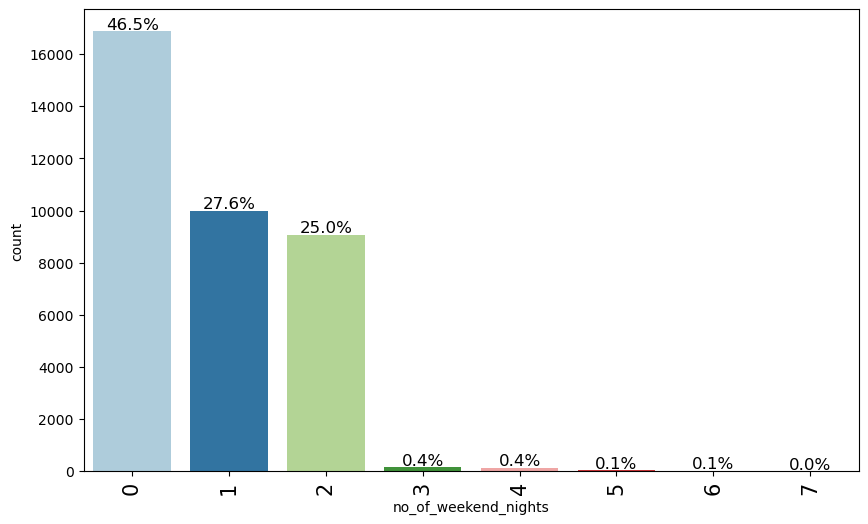

In [ ]:
labeled_barplot(df,'no_of_weekend_nights', perc = True)

* 46.5% of the customers do not plan to spend the weekend in the hotel.
* 52.6% of the hotel vistors spend 1 or 2 days during the weekends.

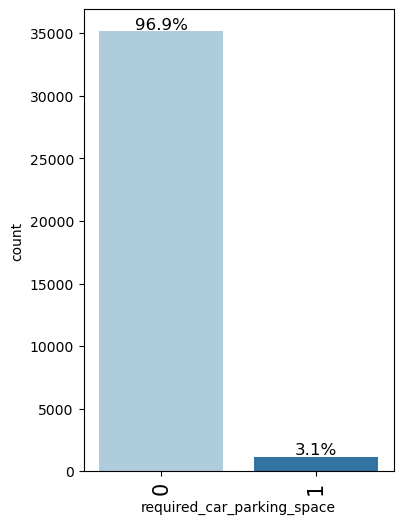

In [ ]:
labeled_barplot(df,'required_car_parking_space', perc = True)

* Only 3% of the visitors require car parking space.

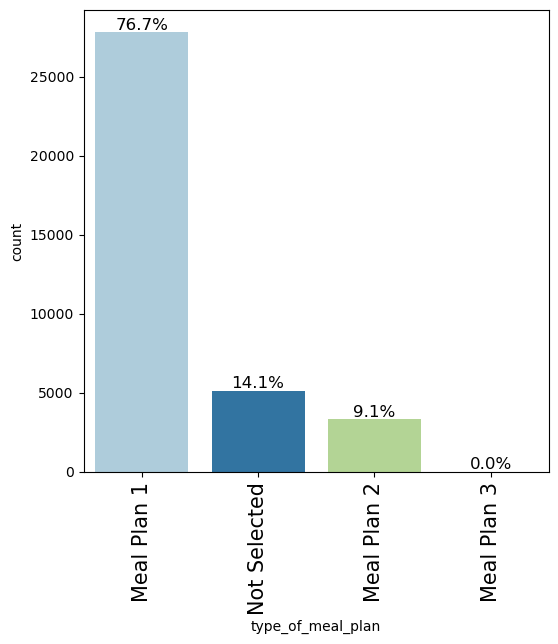

In [ ]:
labeled_barplot(df,'type_of_meal_plan', perc = True)

* 76.7% of the visitors include one breakfast meal with their reservation.
* 14.1% of the vistores do not include any meal in their reservation.

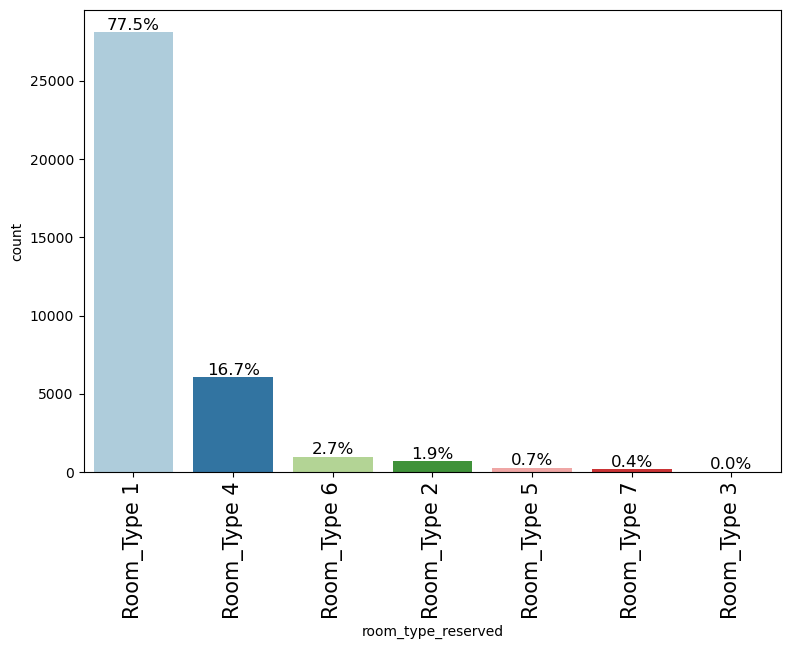

In [ ]:
labeled_barplot(df,'room_type_reserved', perc = True)

* 77.5% of the hotel vistors book room type 1 and 16.7% book room type 4.

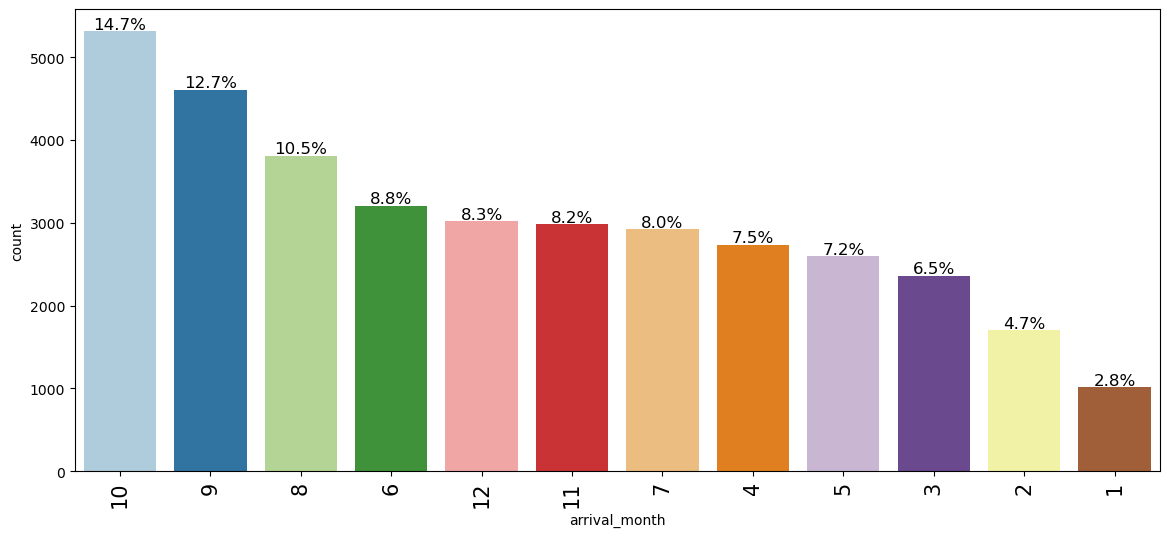

In [ ]:
labeled_barplot(df,'arrival_month', perc = True)

* October stands out with the highest booking rate, reaching 14.7%.
* In August and September, a combined 23.2% of visitors chose these months for their stay.
* The months of June, December, November, and July all exhibit a similar visitor percentage, each approximately around 8%."






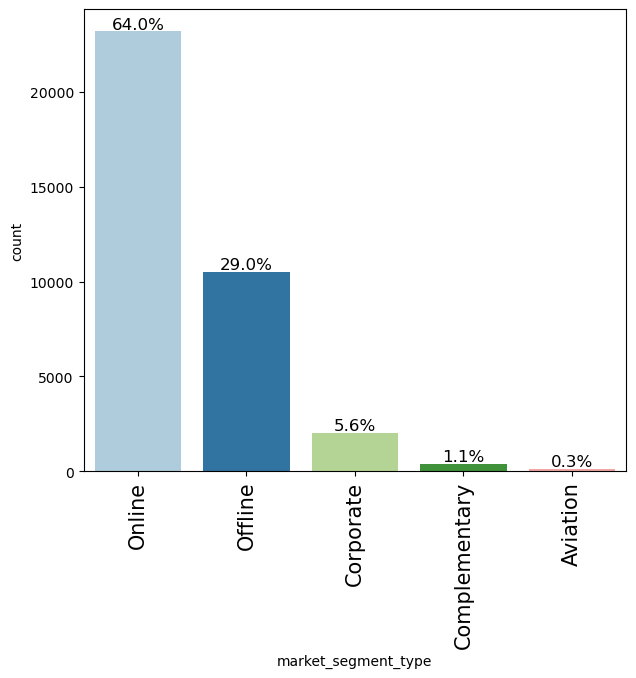

In [ ]:
labeled_barplot(df,'market_segment_type', perc = True)

* 64% of the reservations were made online, followed by 29% of the bookings which were made offline.

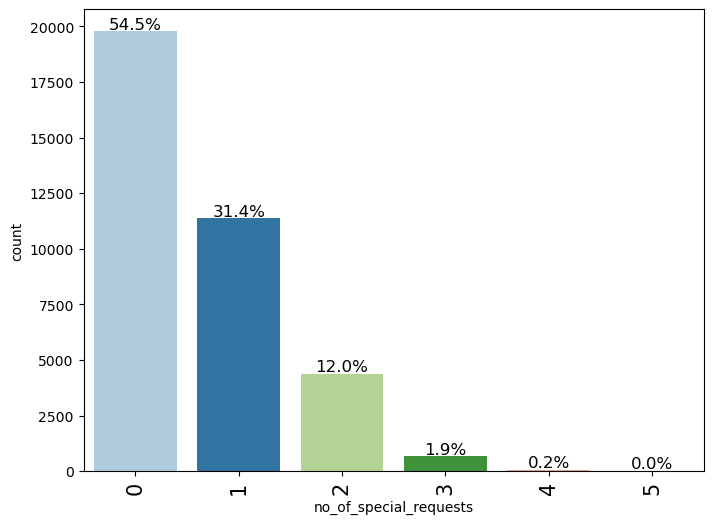

In [ ]:
labeled_barplot(df,'no_of_special_requests', perc = True)

* 54.5% of the customers generally do not make any requests while booking a hotel room.
* Only 31.4% of the visitors had one special request, while 12% had two special requests."

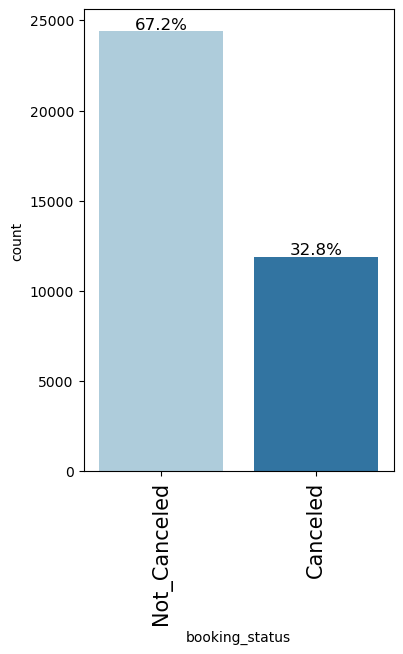

In [ ]:
labeled_barplot(df,'booking_status', perc = True)

* 67.2% of the bookings were not canceled, while 32.8% were canceled.
  
Canceled bookings will be ecoded to ( 1 ) and Not_Canceled as ( 0 ) for further analysis

In [ ]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0)

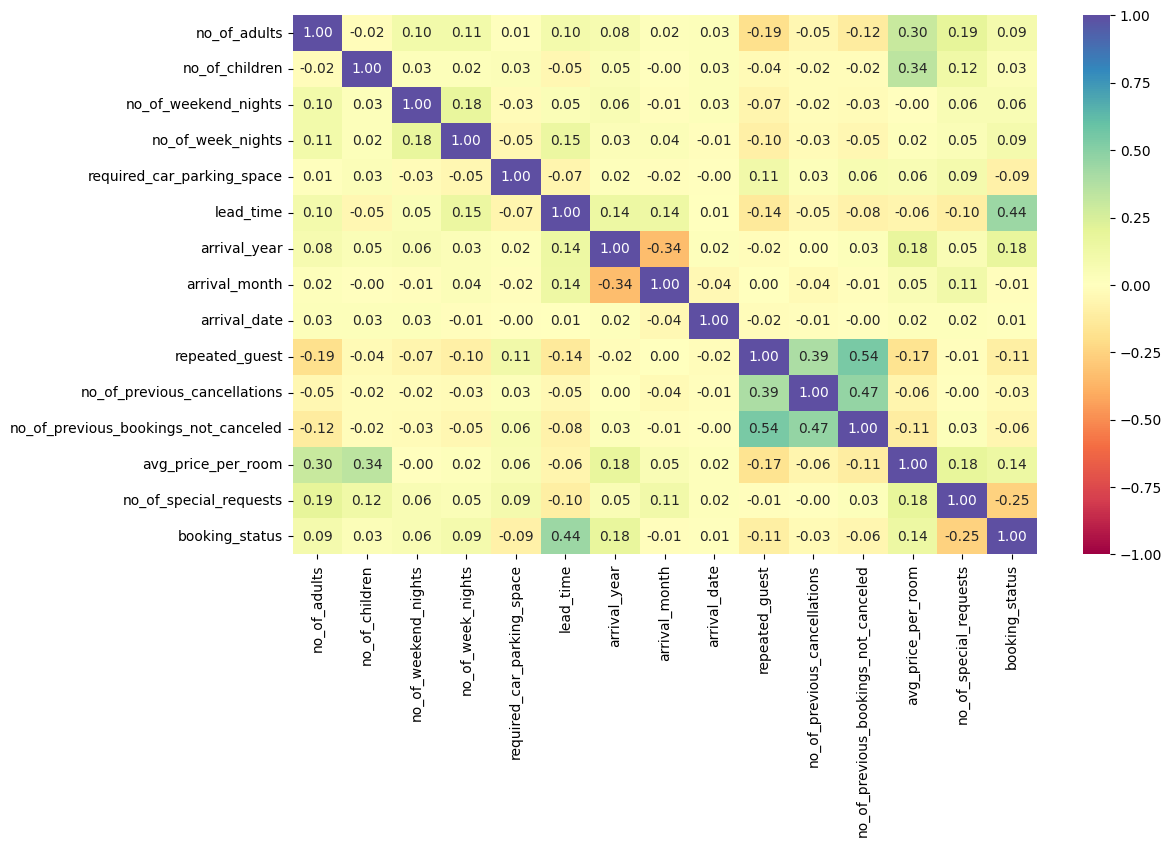

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
     - This makes sense as more the number of customers more rooms they will require which increasing the cost.
* There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation (need further analysis).
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease(need further analysis) .

## EDA

In [ ]:
def stacked_barplot(df, predictor, target):

    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

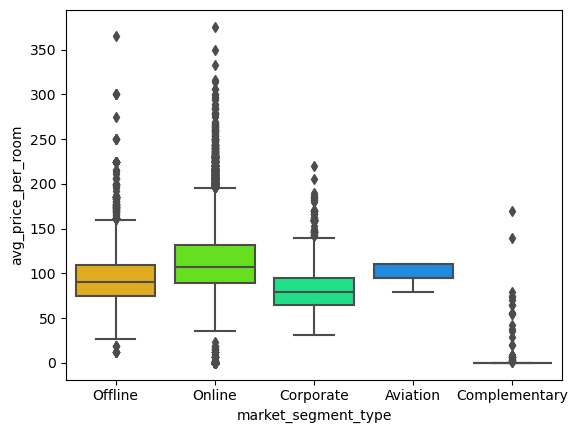

In [ ]:
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow")
plt.show()

* Online bookings have a high variations in prices, with 50% of the prices ranging from approximately 90 to 130 euros per room.
* The boxplot reveals outliers in online bookings, with some rooms having very high prices and others having low prices, depending on the specific site and available offers.
* Offline bookings exhibit a similar pricing pattern to online bookings, with a price range typically ranging from 80 to 110 euros per room.
* The price range for bookings through corporate channels shows a lower range of 60 to 90 euros per room, but there are outliers representing high-priced rooms.
* Aviation bookings display a very narrow range of room prices, typically falling between 100 to 110 euros per room, and there are no outliers in this range.
* Complementary bookings are provided free of charge, but there may be some outliers or exceptions to this where additional charges or conditions apply.

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


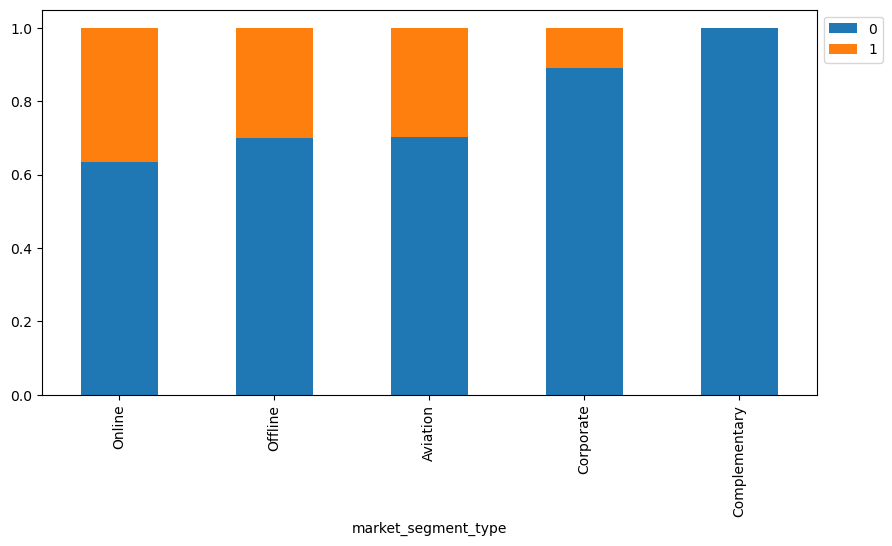

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Online reservations tend to experience a higher rate of cancellations compared to other reservation methods (around 40% cancelation).
* Nearly 30% of reservations made through offline and aviation reservation methods are canceled.
* The corporate reservation method has the lowest number of cancellations, while complementary reservations have zero cancellations.

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


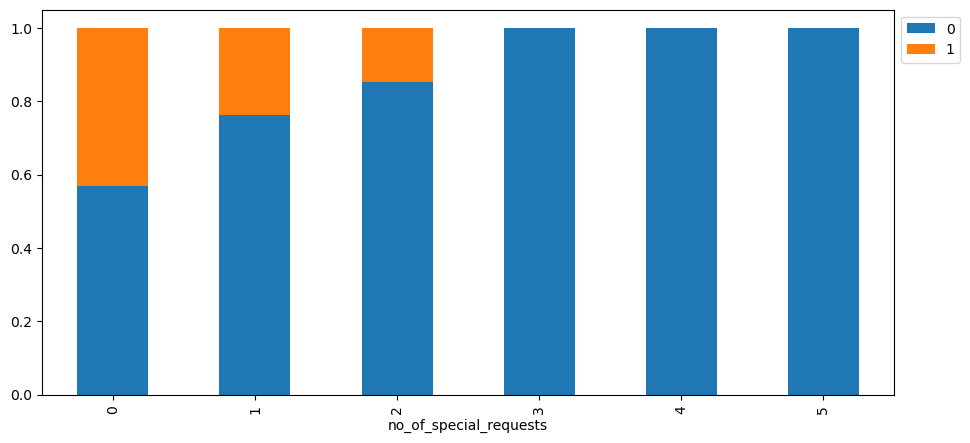

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* It appears that as the number of special requests increases, the cancellation rate decreases.
* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.

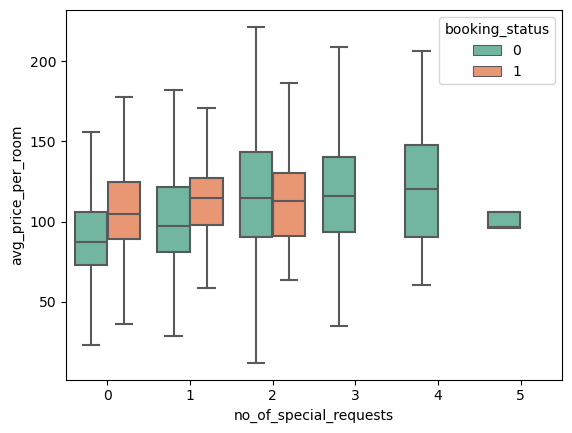

In [ ]:
sns.boxplot(data=df, x='no_of_special_requests', y='avg_price_per_room', hue='booking_status', showfliers=False, palette='Set2')
plt.show()

* Reservations with 0 or 1 special requests and a higher price were canceled.

There is a positive correlation between booking status and average price per room. Need further analysis:

In [ ]:
def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(9, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

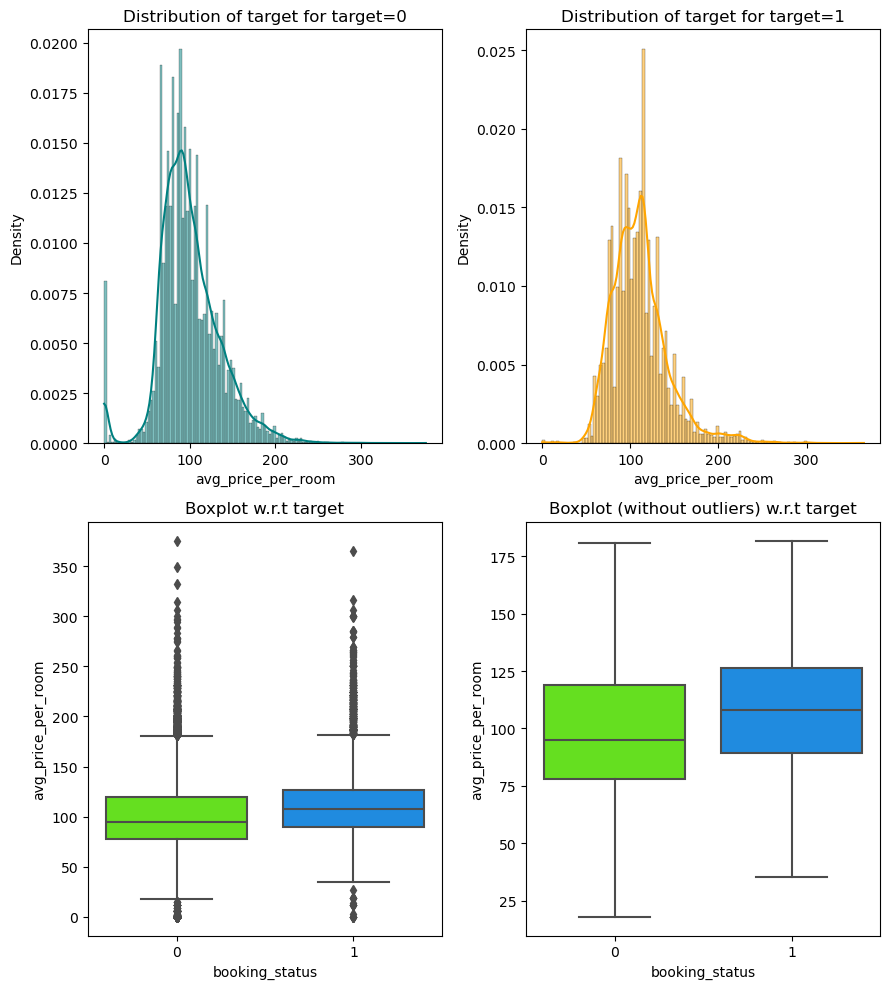

In [ ]:
distribution_plot_wrt_target(df,'avg_price_per_room','booking_status')

* The distribution of price for canceled bookings and not canceled bookings is quite similar.
* The average price of the canceled reservations is slightly higher than the uncanceled reservations.

There is a positive correlation between booking status and lead time also:

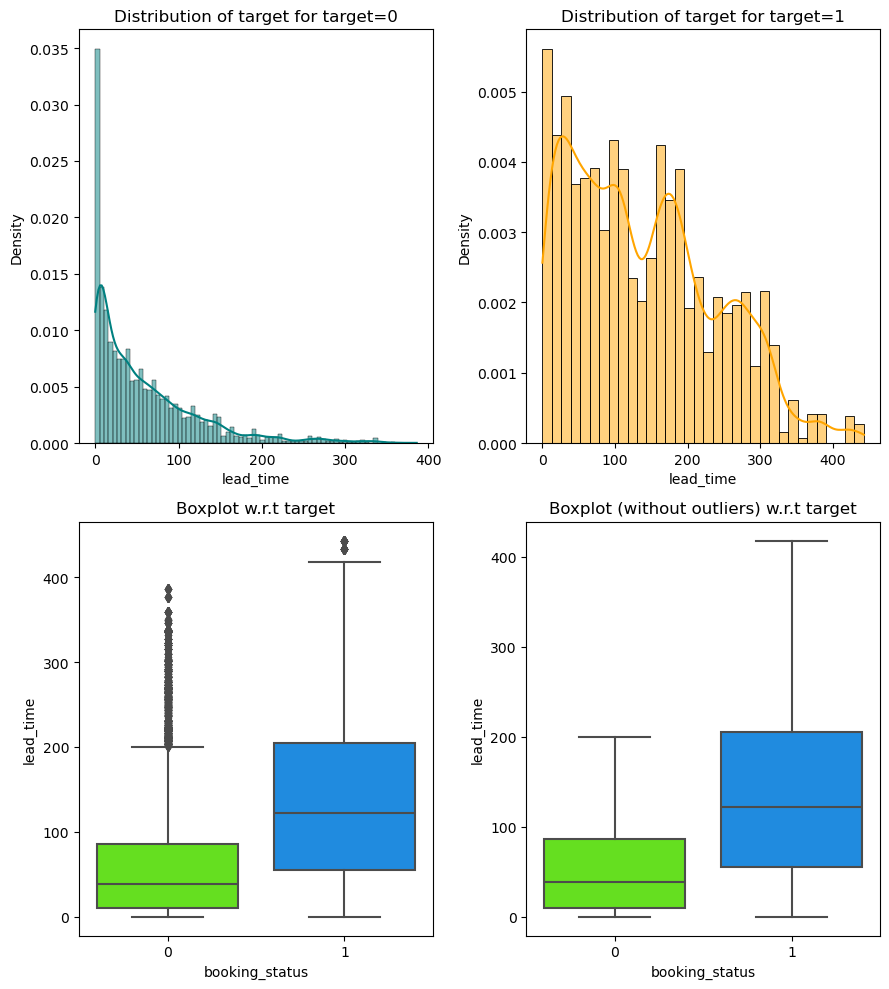

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled.
* Higher the lead time higher are the chances of a booking being canceled.

Generally people travel with their spouse and children for vacations or other activities. A new dataframe of the customers who traveled with their families will be created to analyze the impact on booking status.

In [ ]:
family= df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family.shape

(28441, 18)

In [ ]:
family["tot_family_members"] = (family["no_of_adults"] + family["no_of_children"])

booking_status          0     1    All
tot_family_members                    
All                 18456  9985  28441
2                   15506  8213  23719
3                    2425  1368   3793
4                     514   398    912
5                      11     6     17
------------------------------------------------------------------------------------------------------------------------


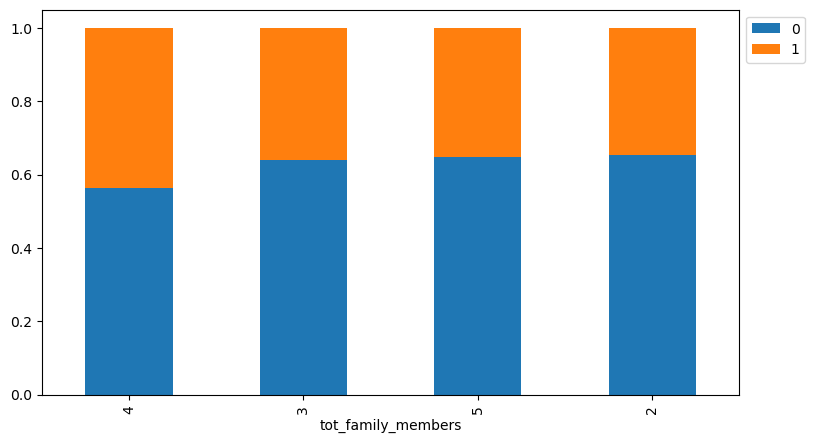

In [ ]:
stacked_barplot(family, 'tot_family_members', 'booking_status')

* There's a ~40% chance of a booking getting canceled if the booking is made for 4 family members.

Similar analysis will be done for the customer who stay for at least a day at the hotel.

In [ ]:
stayed = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stayed.shape

(17094, 18)

In [ ]:
stayed["total_days"] = (stayed["no_of_week_nights"] + stayed["no_of_weekend_nights"])

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

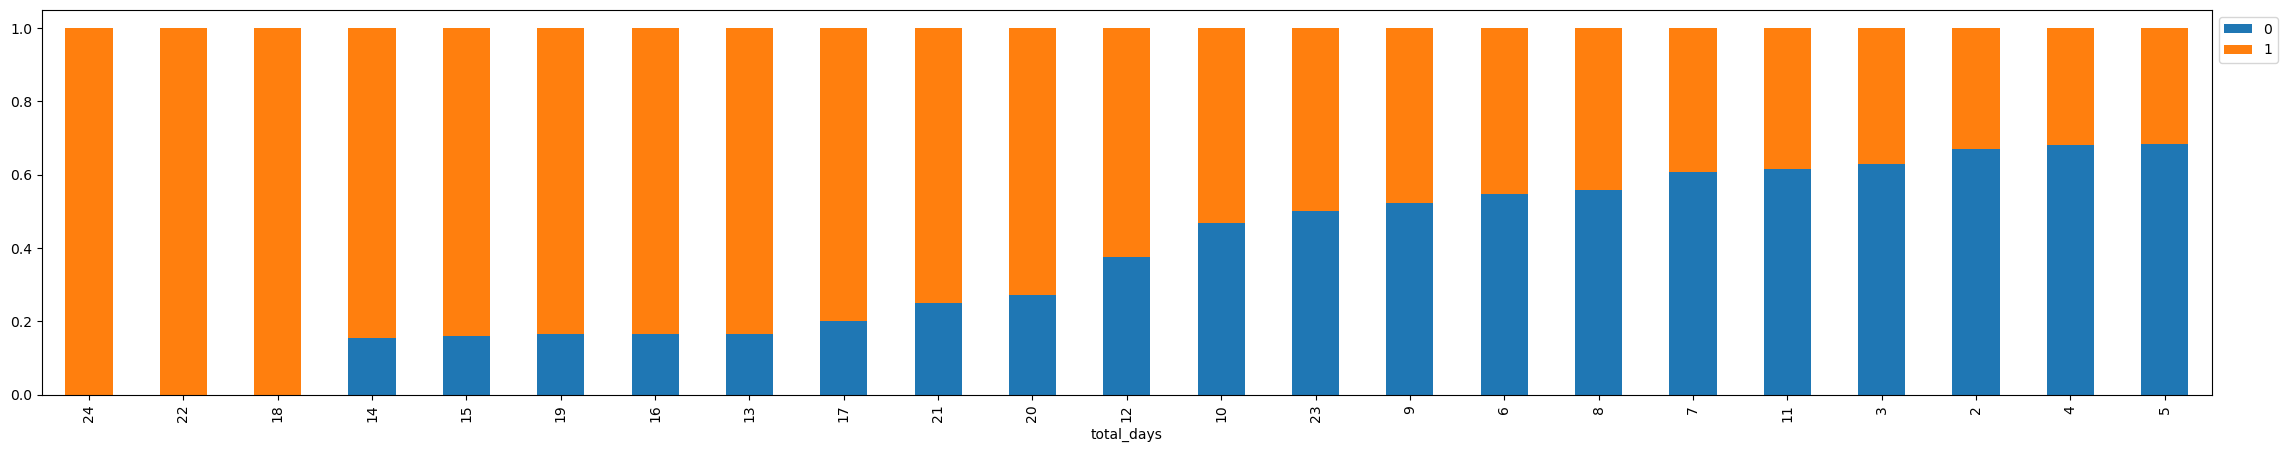

In [ ]:
stacked_barplot(stayed, "total_days", "booking_status")

* The shorter the reservation period, the lower the cancellation rate.
* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


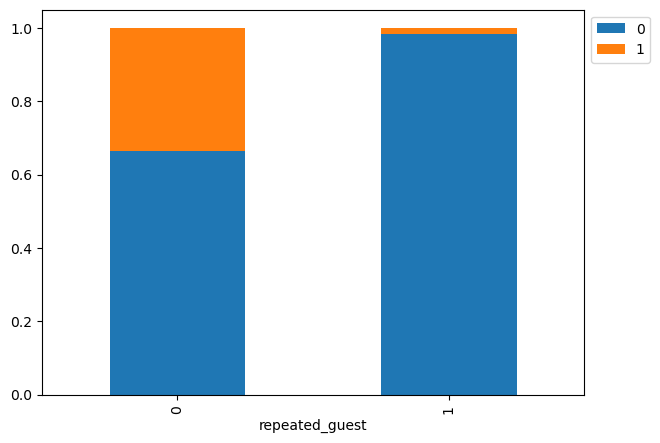

In [ ]:
stacked_barplot(df, 'repeated_guest', 'booking_status')

* There are very few repeat customers but the cancellation among them is very less.
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
* A loyal guest is usually more profitable for the business because they are more familiar with what is on offer at a hotel they have visited before.
* Attracting new customers is tedious and costs more as compared to a repeated guest.

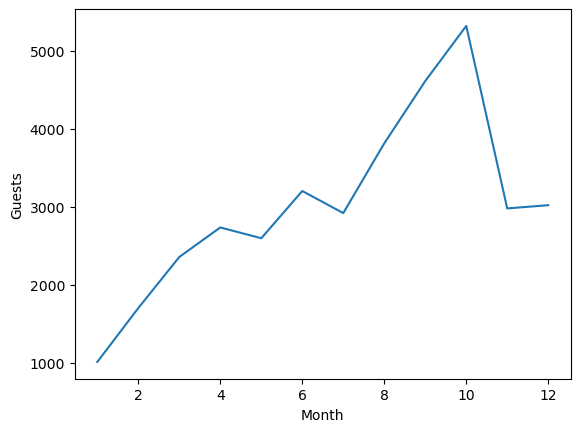

In [ ]:
monthly_df = df.groupby(["arrival_month"])["booking_status"].count()

monthly_df = pd.DataFrame({"Month": list(monthly_df.index), "Guests": list(monthly_df.values)})

sns.lineplot(data=monthly_df, x="Month", y="Guests")
plt.show()

* The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
* October has the highest number of reservations.
* Overall reservations increase as we approach the summer and the end of the year.
* Least bookings were made in January - around 1000 bookings.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


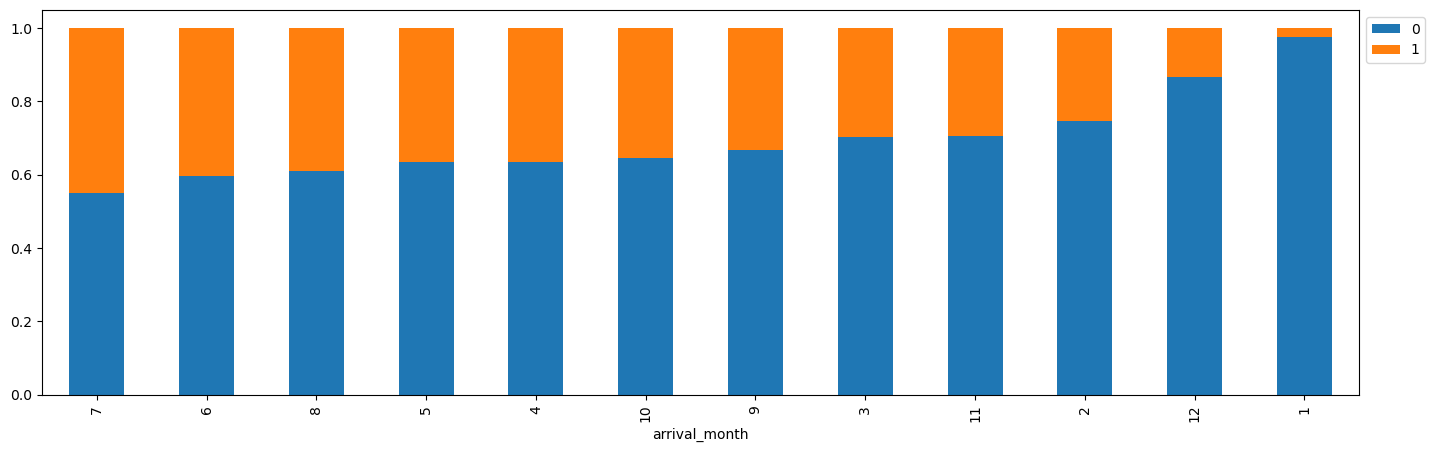

In [ ]:
stacked_barplot(df, 'arrival_month', 'booking_status')

* Month of July has the highest canceled reservations followed by June then August.
* Even though the highest number of bookings were made in September and October around 40% of these bookings got canceled.
* Least bookings were canceled in December and January - customers might have traveled to celebrate Christmas and New Year.

Prices vary accross different months through the year, need a look into that:

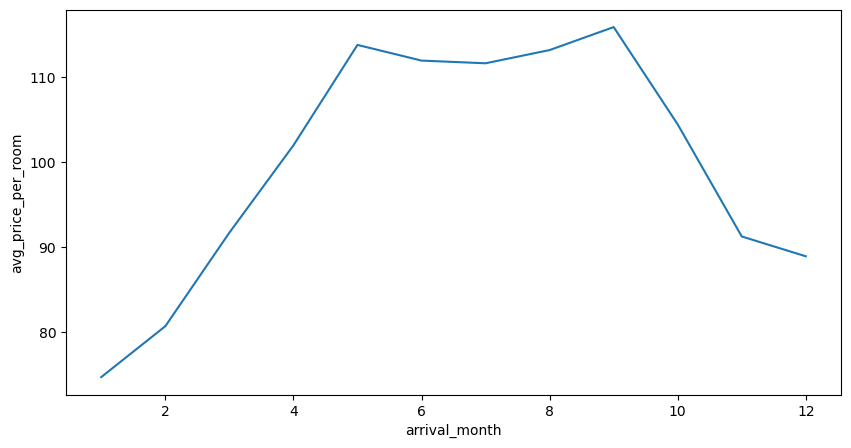

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = df, x='arrival_month', y='avg_price_per_room', ci=None)
plt.show()

* The average room prices increase over the months, peaking from May to September (around 115 euros per room), and then they begin to decrease.

Outliers check in the data:

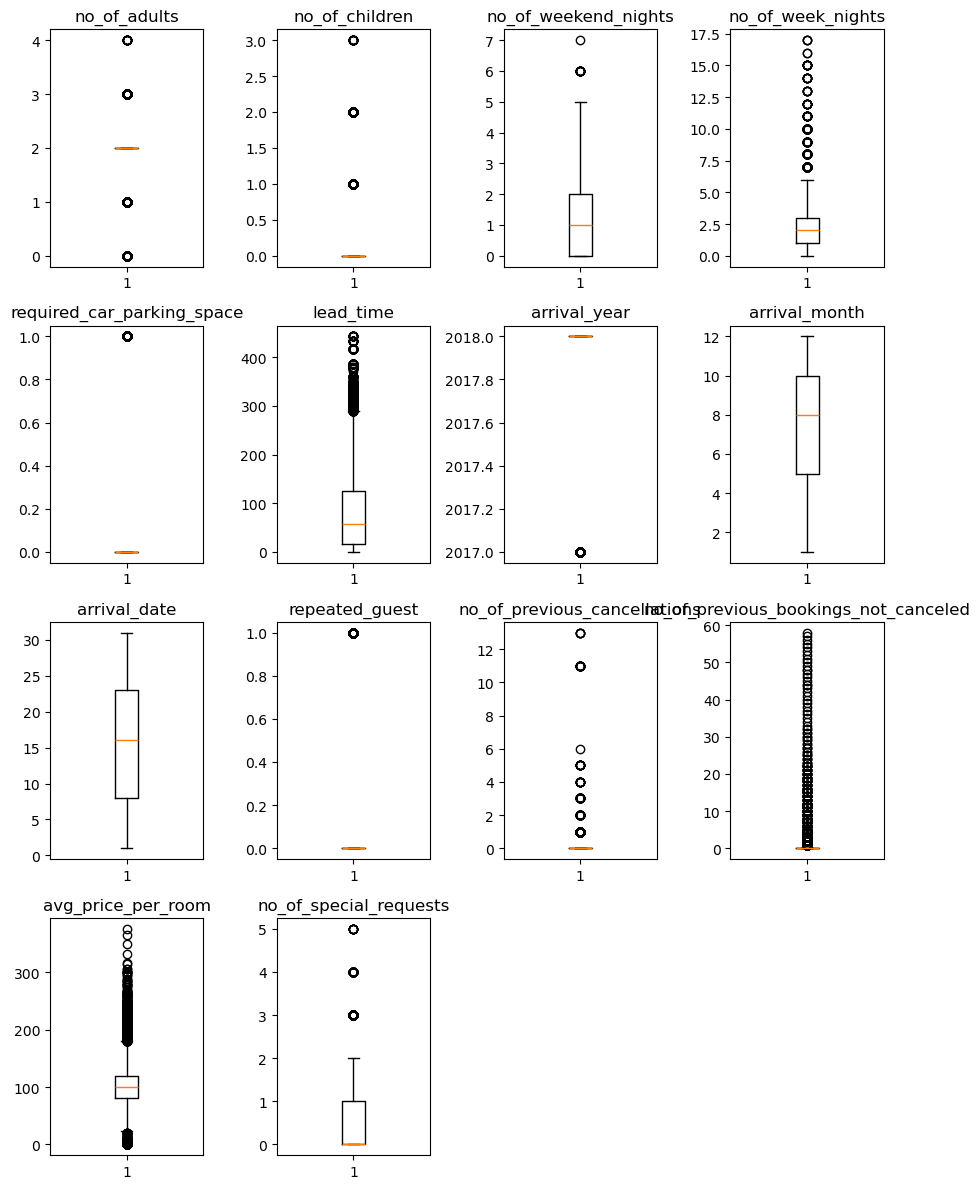

In [ ]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
num_columns.remove("booking_status")

plt.figure(figsize=(9, 12))

for i, variable in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers in the data.However, outliers wont be treated as they are proper values.

## Building a Logistic Regression model

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

In [ ]:
X = sm.add_constant(X)
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ",'\n', X_train.shape)
print("Shape of test set : ",'\n', X_test.shape,'\n')
print("Percentage of classes in training set:")
print(y_train.value_counts('normalize'),'\n')
print("Percentage of classes in test set:")
print(y_test.value_counts('normalize'))

Shape of Training set :  
 (25392, 28)
Shape of test set :  
 (10883, 28) 

Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64 

Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [ ]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.3293
Time:                        18:10:15   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. Considering the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.


In [ ]:

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):

    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):

    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

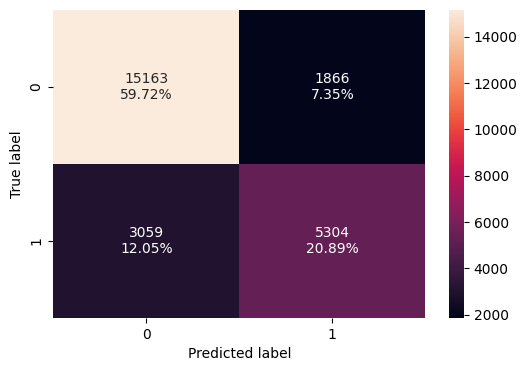

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


* In this case, predicting a visitor who will cancel the reservation but doesn't (FP) or predicting a visitor who won't cancel but does (FN) both have significant cost implications for the hotel. Therefore, best course of action is to prioritize F1 score as it balances the importance of both precision and recall in our prediction model

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [
       "{:.2f}".format(variance_inflation_factor(predictors.values, i))
        for i in range(len(predictors.columns))]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39468156.71
1,no_of_adults,1.35
2,no_of_children,1.98
3,no_of_weekend_nights,1.07
4,no_of_week_nights,1.10
5,required_car_parking_space,1.04
6,lead_time,1.39
7,arrival_year,1.43
8,arrival_month,1.28
9,arrival_date,1.01


* None of the numerical variables exhibit high multicollinearity, so the values in the summary are reliable.
* High VIF values for the categorical variables will not be igored.


In [ ]:
cols = X_train.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = X_train[cols]

    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.3283
Time:                        18:14:05   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.


* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

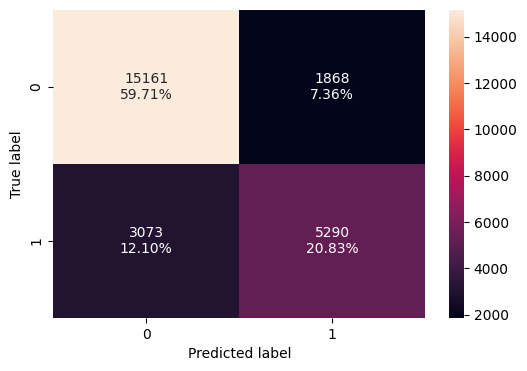

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
odds = np.exp(lg1.params)
perc_change_odds = (np.exp(lg1.params) - 1) * 100
pd.set_option("display.max_columns", None)
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


* Number of adults: Holding all other features constant, an increase in the number of adults visiting the hotel will increase the odds of a customer canceling the reservation by a factor of 1.1, which is equivalent to an 11.4% increase in odds.

* Number of children : Holding all other features constant, an increase in the number of children will increase the odds of a customer canceling the reservations by a factor of 1.16, which corresponds to a 16.5% increase in the odds.

* Number of weekend nights spent: Holding all other features constant, an increase in the number of days spent over the weekend will increase the odds of a customer canceling the reservations by a factor of 1.1, which corresponds to a 11.4% increase in the odds.

* Number of week nights spent: Holding all other features constant, an increase in the number of days spent over the week will increase the odds of a customer canceling the reservations by a factor of 1, which corresponds to a 4.2% increase in the odds.

* Car parking space: Holding all other features constant if the customer requested parking space that will decrease the odds of a customer canceling the reservations by a factor of 0.2, which corresponds to a 79% decrease in the odds.

* Lead time: Holding all other features constant, an increase in lead time increase the odds of a customer canceling the reservations by a factor of 1, which corresponds to a 1.5% increase in the odds.

* Repeated guests: Holding all other features constant if the customer was a repeated gusts that will decrease the odds the odds of a customer canceling the reservations by a factor of 0.06, which corresponds to a 93% decrease in the odds of cancellation.

* Special requests: Holding all other features constant, As number of special requests increase by 0.2 factor that will decrease the odds of the cansellation of the reservations by 77%.

* Type of meal plan: Holding all other features constant, if the customer choose food meal plan type 2 the odds of cancelation (17.8%) is lower than the not selcting meal plan (33%).

* Market sigmnet type: Holding all other features constant, if the resercation is made through a corporate then the odd of canceling decrease by 54.6%, likewise if the reservation was made offline the the odd of canceling decreases by 83.2%.



In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


* All the variables left have p-value<0.05.
* lg1 is the best model for making any inference.
* The performance on the training data is the same as before dropping the variables with the high p-value.

## Model performance evaluation

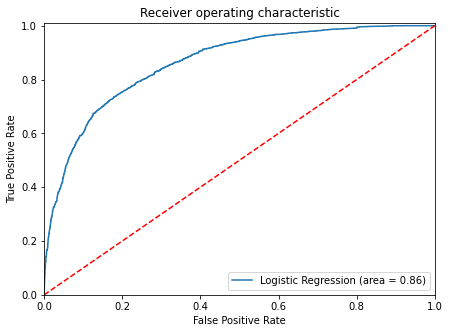

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.86 on training is quite good.

Testing if recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


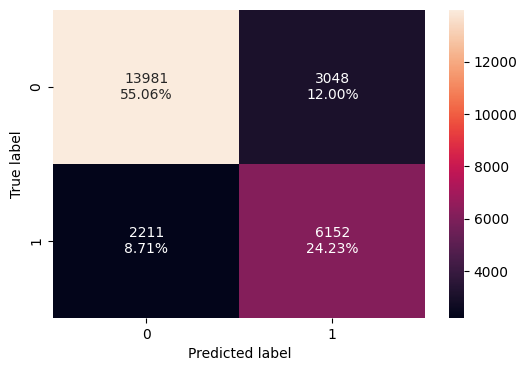

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


* Recall has increased significantly as compared to the previous model.
* As threshold value decrease, Recall will keep on increasing and the Precision will decrease, an optimal balance between recall and precision needed.

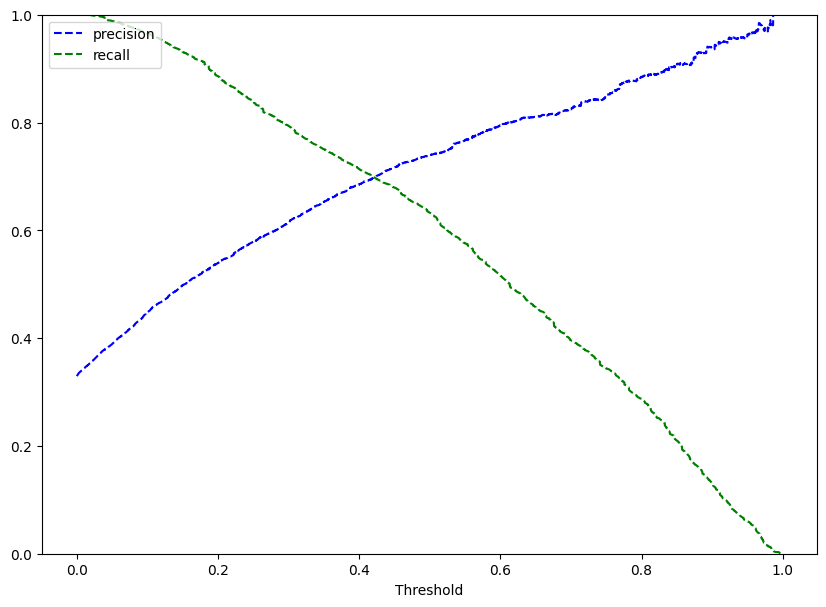

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

In [ ]:
optimal_threshold_curve = 0.42

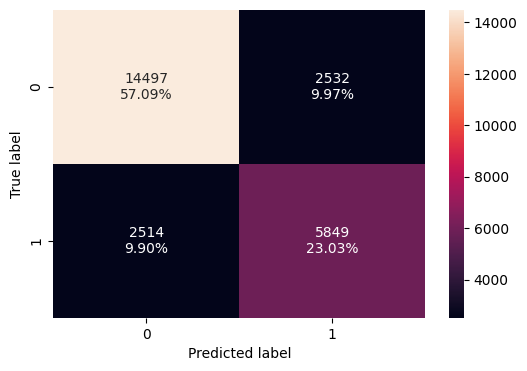

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold= optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


* F1 score decreased however it is still higher than the intial model.
* Model has given a balanced performance in terms of precision and recall.

Test data:

In [ ]:
X_test1 = X_test[selected_features]

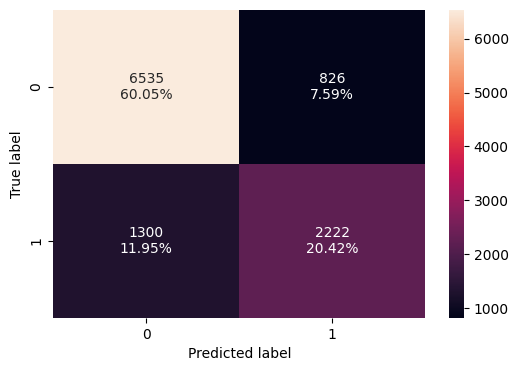

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


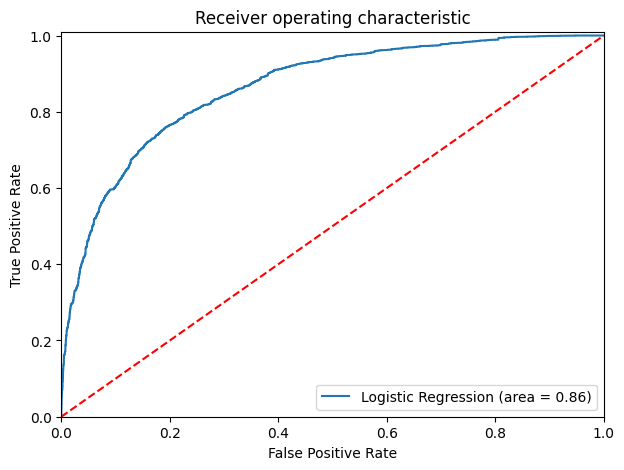

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


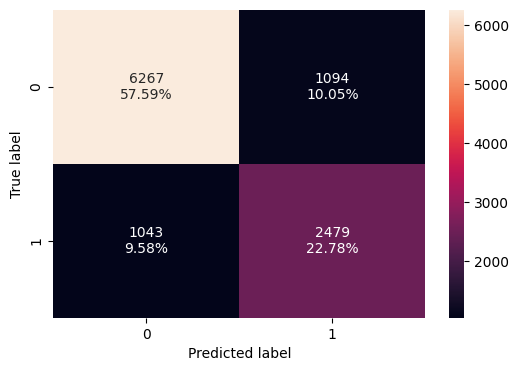

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


## Final Model Summary

In [ ]:
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


In [ ]:
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


* Observations from logistic regression model:
- We have been able to build a predictive model that can be used by the hotel to predict which bookings are likely to be cancelled with an F1 score of 0.69 on the training set and formulate marketing policies accordingly.

* The logistic regression models are giving a generalized performance on training and test set.

* **Using the model with default threshold the model will give a low recall but good precision score -** The hotel will be able to predict which bookings will not be cancelled and will be able to provide satisfactory services to those customers which help in maintaining the brand equity but will lose on resources.
* **Using the model with a 0.37 threshold the model will give a high recall but low precision score -** The hotel will be able to save resources by correctly predicting the bookings which are likely to be cancelled but might damage the brand equity.
* **Using the model with a 0.42 threshold the model will give a balance recall and precision score -** The hotel will be able to maintain a balance between resources and brand equity.

* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests and some others are negative, an increase in these will lead to a decrease in chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, type_of_meal_plan_Not Selected and some others are positive, an increase in these will lead to a increase in the chances of a customer canceling their booking.

## Building a Decision Tree model

In [ ]:
X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts('normalize'))
print("Percentage of classes in test set:")
print(y_test.value_counts('normalize'))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


In [ ]:
def model_performance_classification_sklearn(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

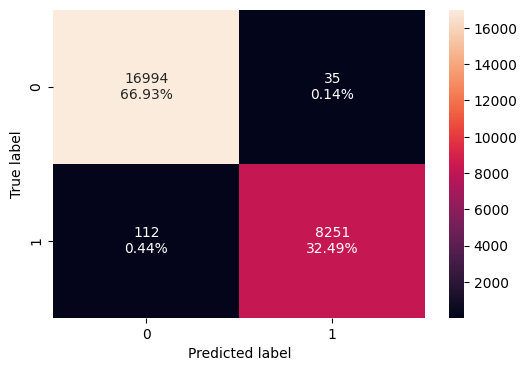

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set indicating the overfitting of the model on the train data.

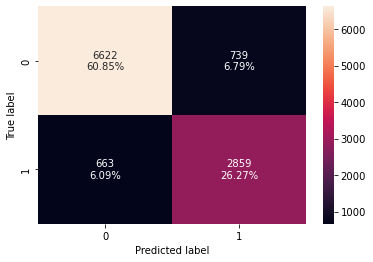

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* The decision tree needs to be prune.

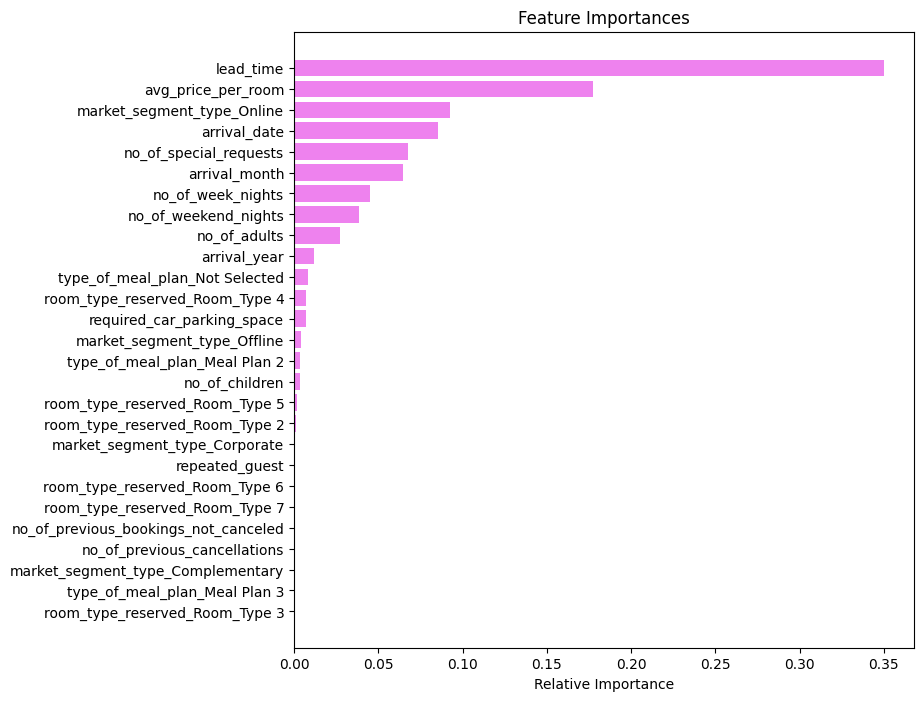

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time, average price per room and market degment type are the top 3 important features.

## Pruning the tree:

In [ ]:
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
acc_scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
estimator = grid_obj.best_estimator_
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

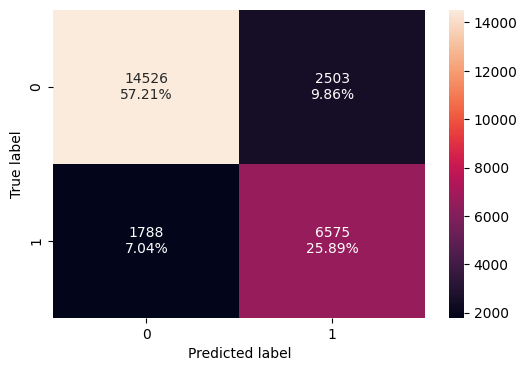

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


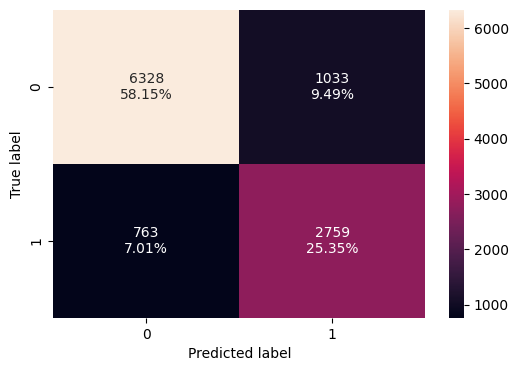

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


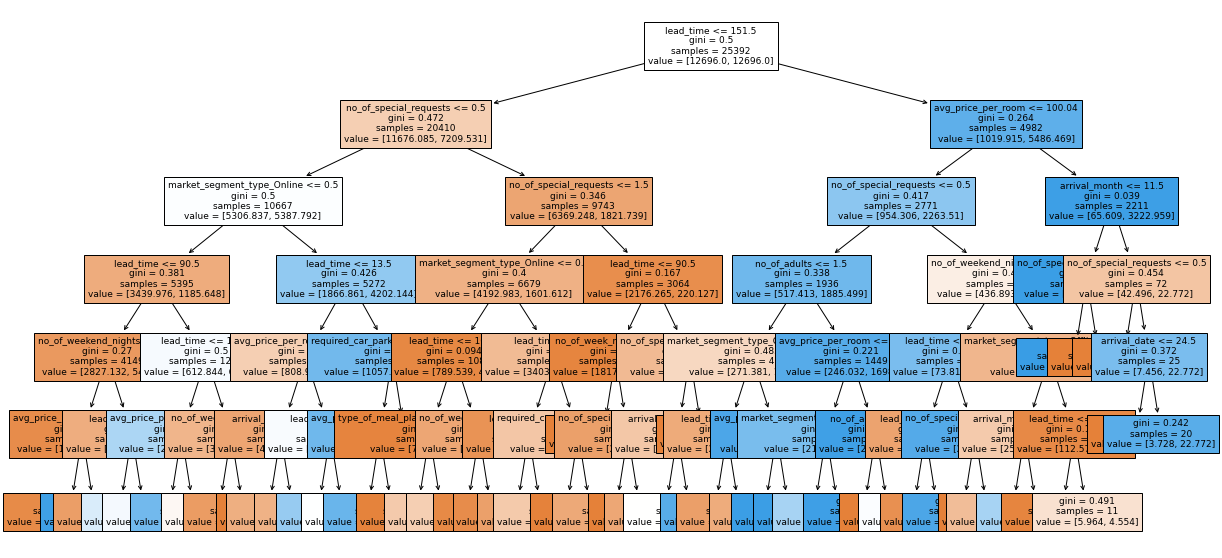

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

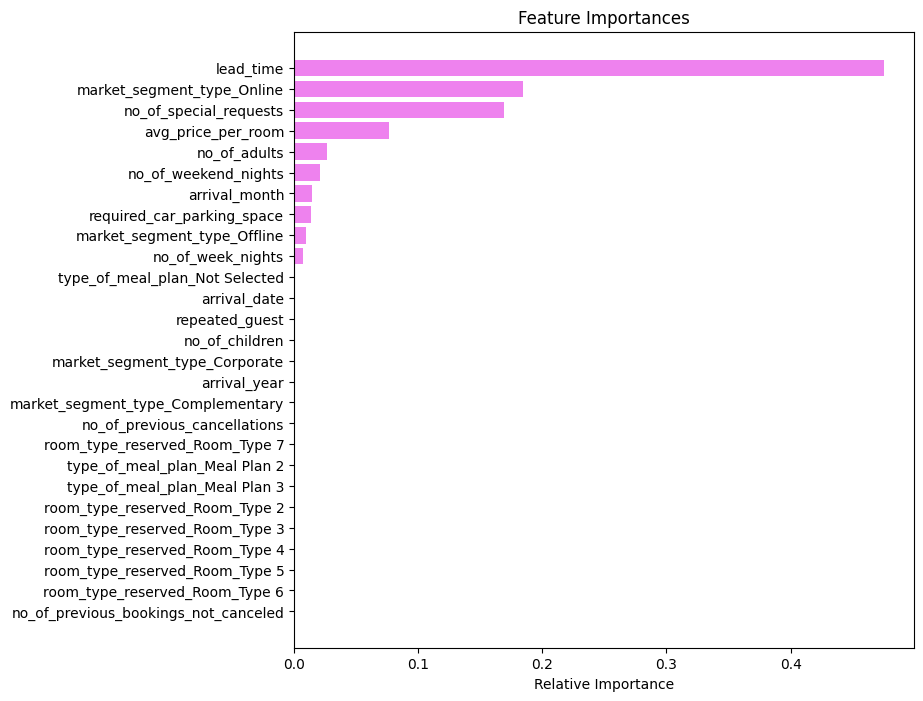

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


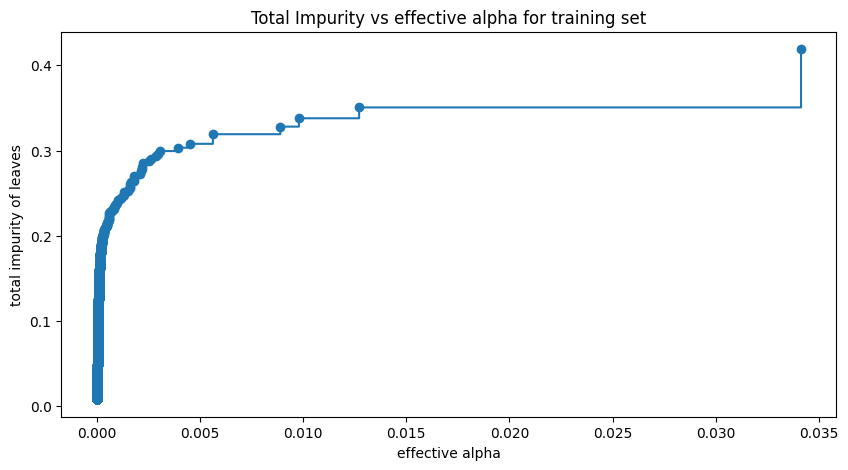

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


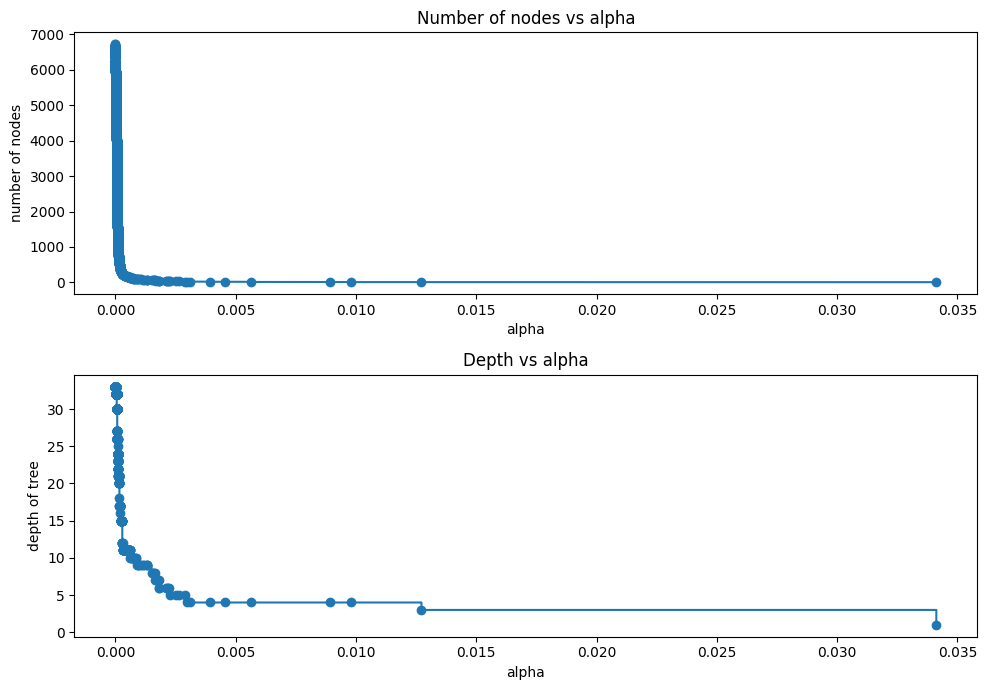

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

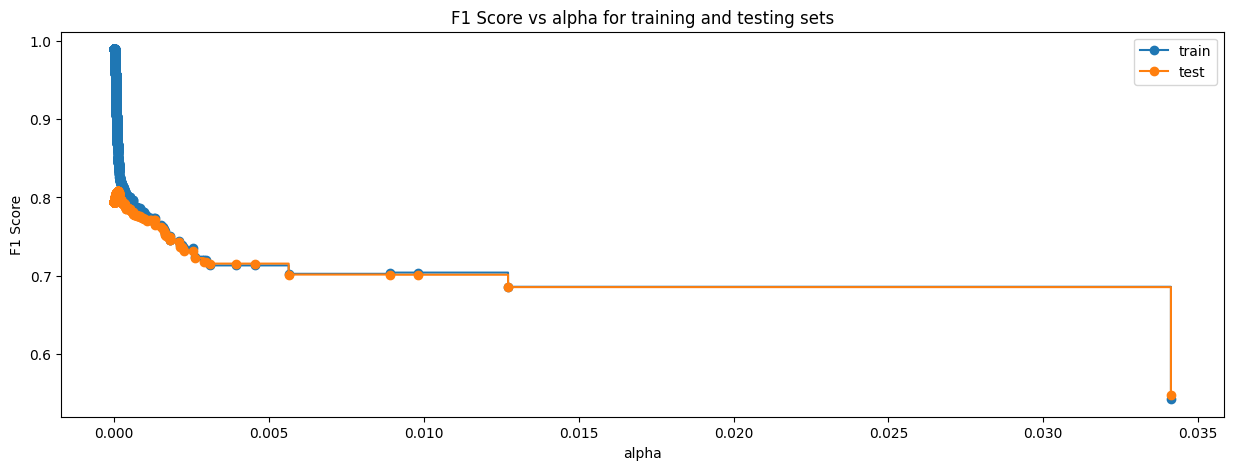

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90005,0.90350,0.81361,0.85620


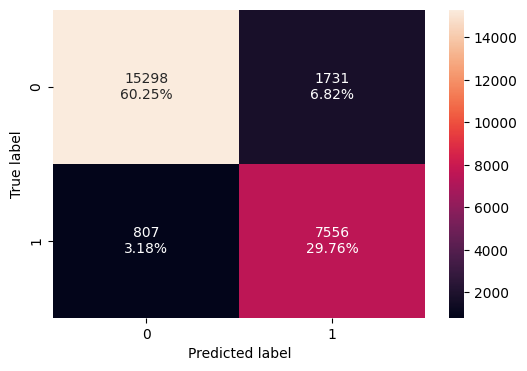

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86869,0.85576,0.76595,0.80837


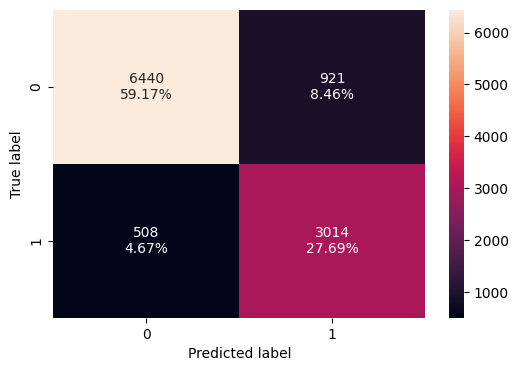

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

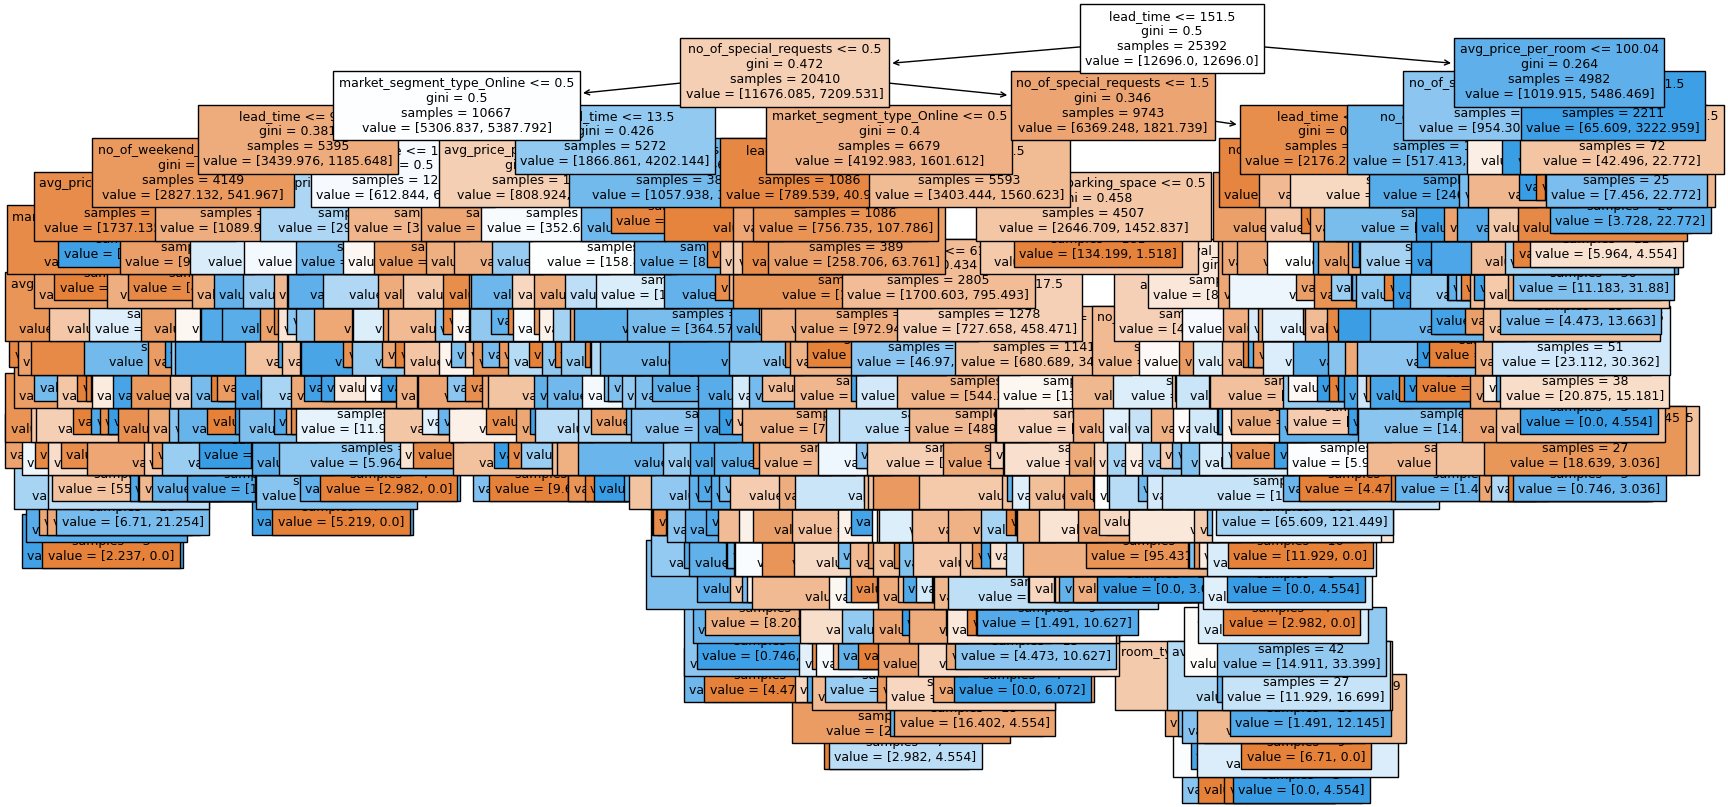

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

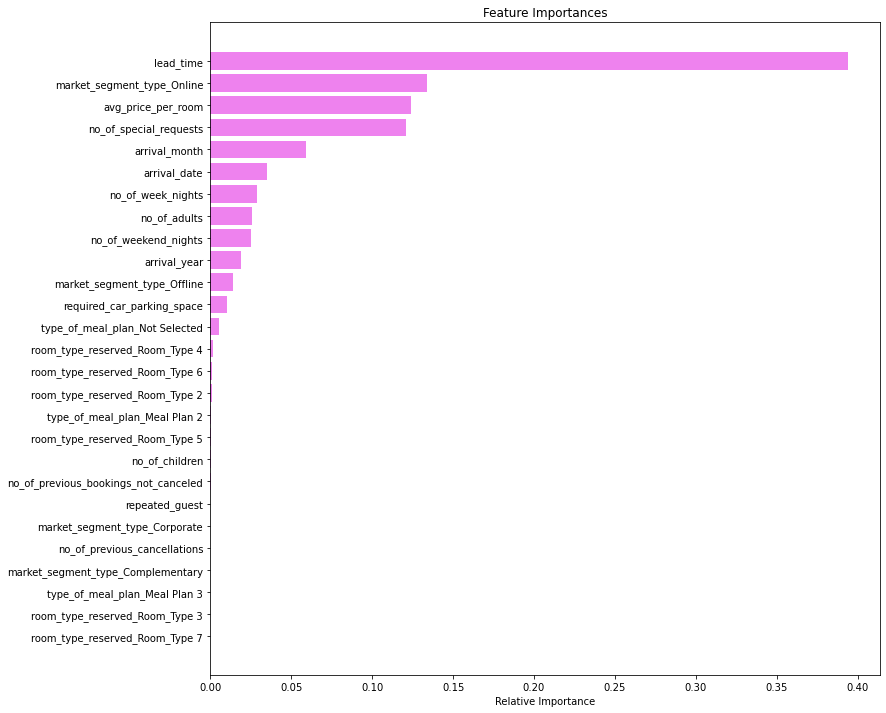

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83101,0.90005
Recall,0.98661,0.78620,0.90350
Precision,0.99578,0.72428,0.81361
F1,0.99117,0.75397,0.85620


In [ ]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.83497,0.86869
Recall,0.81034,0.78336,0.85576
Precision,0.79521,0.72758,0.76595
F1,0.80270,0.75444,0.80837


* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* Post-pruned tree is giving a high F1 score as compared to other models but the difference between precision and recall is high.
* The hotel will be able to maintain a balance between resources and brand equity using the pre-pruned decision tree model.

## Actionable Insights and Recommendations:

Insight:

* Overall the Decision Tree model performs better on the dataset.

* Looking at important variables based on p-values in Logistic regression and feature importance in the Decision Tree model
    * Lead Time, Number of special requests, Average price per room are important in both model
    
    * From the Logistic Regression model we observe that Lead Time, and Average price per room have a positive relation with bookings getting canclled. And the number of special requests has negative relation with bookings getting cancelled.

Recomndations:

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. Bookings where a customer has made a special request and the booking was done under 151 days to the date of arrival are less likely to be canceled.

  * Using this information, the hotel can take the following actions:
    * Set up a system that can send an automated email to the customers before the arrival date asking for a re-confirmation of their booking and any changes they would like to make in their bookings.
    * Remind guests about deadlines.
    
The response given by the customer will give the hotel time to re-sell the room or make preparations for the customers' requests.

2. Stricter cancellation policies can be adopted by the hotel.
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Cancellation policies should be consistent across all market segments but as noticed from the analysis high percentage of bookings done online are cancelled. The booking cancelled online should give less percentage of refund to the customers.(The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking)


3. The length of stay at the hotel can be restricted.
    * Analysis shows that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * The hotel can accepts bookings for up to 5 days. Corporate and Aviation guests can extend their stay easily, while for others, extending may require re-booking to ensure a smooth experience.


4. In the months of December and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.

5. Improving the experience of repeated customers.

    * Analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for hotel as they can help in spreading the word of mouth.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.


6. Hotel can start a post-bbooking interaction with the customers showing  attention and care they would receive at the hotel also information about local events, nearby places to explore, etc can be shared from time to time, this can decrease cancelation.
